# Analyzing Spotify Features

## 1. Introduction

In this section, I visualize the Spotify features of Taylor Swift's music. For simplicity, I will only be focusing on comparing her 9 studio albums.

I discuss the results of this analysis in greater detail in the blog *Comparing the Spotify Features of Taylor Swift's Albums*. The code used to produce these plots can be found below.

### 1.1 Importing Packages

These are the packages used in this section of the project.

In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Importing the Data

I imported the file `swift_data.csv` from the data folder, which is the output of the `swift_data.ipynb` script.

In [2]:
# Import data
df = pd.read_csv('data/swift_data.csv')

## 2. Preparing Visualizations

### 2.1 Data Preparation

Since I am only including songs from Taylor's studio albums, I filtered the dataset to include only those albums. In addition, I am adding the following restrictions:

- Bonus tracks from deluxe editions will be included
- Stand-alone singles such as *Today Was A Fairytale* will not be included
- Alternate versions of songs will be also be excluded such as *Forever & Always (Piano Version)* or *Red (Original Demo Recording)*

With these restrictions, each album should have the following number of tracks:

1. Taylor Swift - 14
2. Fearless - 18
3. Speak Now - 17
4. Red - 19
5. 1989 - 16
6. reputation - 15
7. Lover - 18
8. folklore - 17
9. evermore - 17

In [4]:
# Drop songs that are not a part of her studio albums
df = df[(df['album'] != 'Other') & 
        (df['album'] != 'Fearless (Taylor\'s Version)') & 
        (df['album'] != 'Red (Taylor\'s Version)') & 
        (df['album'] != '1989 (Taylor\'s Version)')]

In [5]:
# Drop standalone singles and alternative versions of her songs
df = df[(df['name'] != 'Teardrops on My Guitar - Pop Version') & 
        (df['name'] != 'Forever & Always - Piano Version') & 
        (df['name'] != 'Today Was A Fairytale') &
        (df['name'] != 'Back To December - Acoustic') & 
        (df['name'] != 'Haunted - Acoustic Version') &
        (df['name'] != 'Mine - POP Mix') & 
        (df['name'] != 'Treacherous - Original Demo Recording') & 
        (df['name'] != 'Red - Original Demo Recording') & 
        (df['name'] != 'State Of Grace - Acoustic') &
        (df['name'] != 'Better Man') & 
        (df['name'] != 'Babe (feat. Taylor Swift)') & 
        (df['name'] != 'Ronan')]

In [6]:
# Verify the number of tracks
df.groupby('album').count()['name']

album
1989            16
Fearless        18
Lover           18
Red             19
Speak Now       17
Taylor Swift    14
evermore        17
folklore        17
reputation      15
Name: name, dtype: int64

In [3]:
# Change length of songs from miliseconds to minutes
df['length'] = df['length'] / 1000 / 60

### 2.2 Formatting

Prior to data visualization, I defined some formatting parameters to be used throughout the code. These include:

- Creating a custom color palette associated with each album's aesthetic with inspiration from [pinterest](https://www.pinterest.com/pin/5207355811270954/?mt=login)
- Setting a consistent plot format
- Setting a consistent rounding of numbers displayed in a table

In [7]:
# Create a custom palette of colors associated with each album's aesthetic
colors = ['#50A7E0', '#FFEC8B', '#8968CD', '#DC143C', '#FFE4B5','#676767', '#FFB5C5', '#BABABA', '#A56B46']

swift_palette = sns.set_palette(sns.color_palette(colors))

In [8]:
# Set plot formatting for consistency
sns.set_context("talk", font_scale = 1)

# Set data frame formatting
pd.options.display.float_format = '{:,.2f}'.format

### 2.3 Defining Functions

Finally, I defined some function to simplify the visualization process, as well as displaying informative tables and statistics.

1. `plot_feature()` - this function takes a dataframe, feature, title, and xlabel as inputs and displays a side-by-side plot of the boxplot and histogram
2. `get_summary()` - this function takes a dataframe and a feature and returns a table of the numerical summary of that feature
3. `get_top_five()` - this function takes a dataframe, feature, and a boolean and returns a table of the songs with the top 5 or lowest 5 features. Set the boolean to `True` for the top 5 and `False` for the lowest 5

In [9]:
# Define function that plots a boxplot of the features by album and a histogram of that feature
def plot_feature(df, feature, title, xlabel):
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 9))

    # Plot boxplot
    sns.boxplot(x = feature, y = 'album', data = df, palette = swift_palette, showfliers = False, ax = ax1)
    sns.swarmplot(x = feature, y = 'album', data = df, linewidth = 1, ax = ax1)
    ax1.set_title(title + ' by Album')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Album')

    # Plot histogram
    sns.histplot(x = feature, data = df, ax = ax2, kde = True, bins = 10)
    ax2.set_title('Histogram of ' + title)
    ax2.set_xlabel(xlabel)
    
    # Save plot to images folder
    plt.savefig('images/' + feature + '_plot.png')

In [10]:
# Define function to display table of summary statistics
def get_summary(df, feature):
    return pd.DataFrame(df[feature].describe()).transpose()

In [11]:
# Define function to display the top 5 or bottom 5 songs of a specific feature
def get_top_five(df, feature, top):
    
    if top:
        result = df[['name', 'album', feature]].sort_values(feature, ascending = False).head(5)
    else:
        result = df[['name', 'album', feature]].sort_values(feature, ascending = True).head(5)
        
    return result

## 3. Visualizing Features

### 3.1 Length

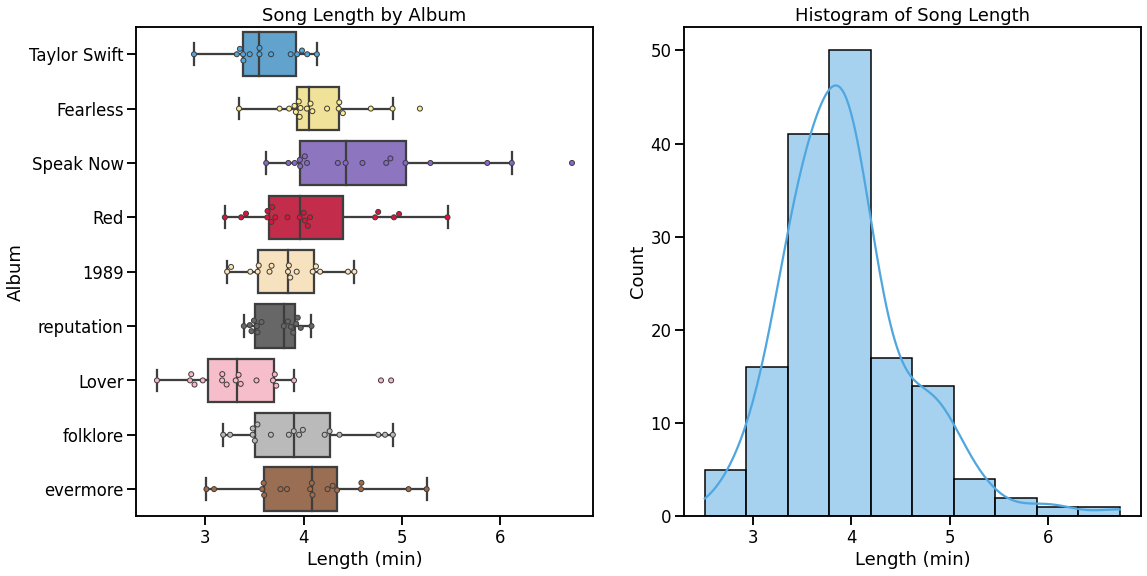

In [12]:
# Plot feature
plot_feature(df, 'length', 'Song Length', 'Length (min)')

In [13]:
# Display numerical summary
get_summary(df, 'length')

,count,mean,std,min,25%,50%,75%,max
length,151.00,3.95,0.65,2.51,3.53,3.90,4.23,6.73


In [14]:
# Display top 5 songs
get_top_five(df, 'length', True)

,name,album,length
38,Dear John,Speak Now,6.73
46,Last Kiss,Speak Now,6.12
42,Enchanted,Speak Now,5.87
58,All Too Well,Red,5.46
47,Long Live,Speak Now,5.29


In [15]:
# Display lowest 5 songs 
get_top_five(df, 'length', False)

,name,album,length
130,It's Nice To Have A Friend,Lover,2.51
114,I Forgot That You Existed,Lover,2.84
127,You Need To Calm Down,Lover,2.86
1,Picture To Burn,Taylor Swift,2.88
119,I Think He Knows,Lover,2.89


### 3.2 Popularity

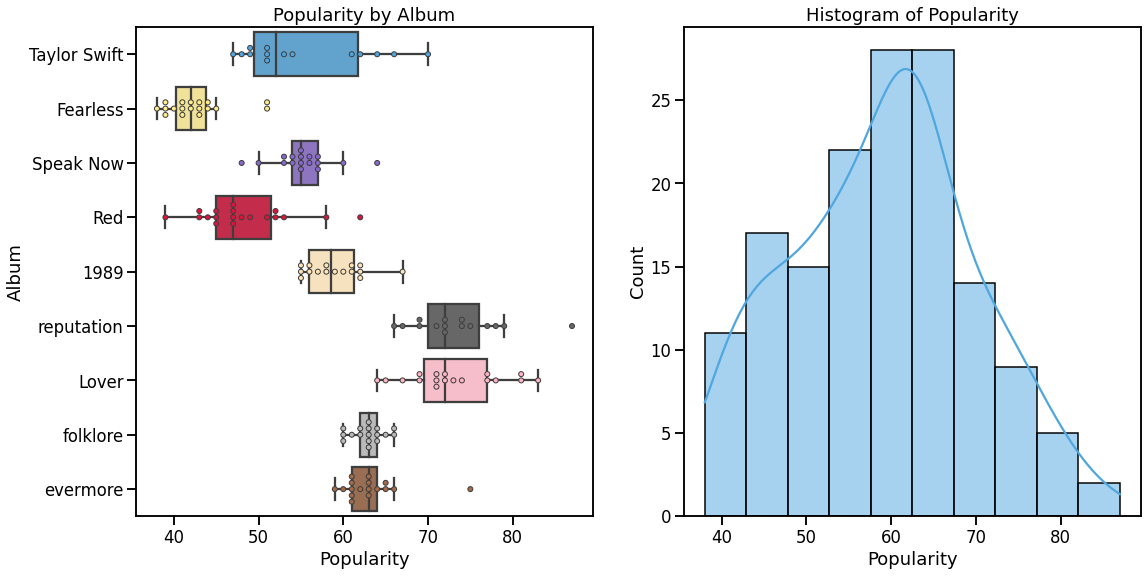

In [16]:
# Plot feature
plot_feature(df, 'popularity', 'Popularity', 'Popularity')

In [17]:
# Display numerical summary
get_summary(df, 'popularity')

,count,mean,std,min,25%,50%,75%,max
popularity,151.00,58.95,10.89,38.00,51.00,60.00,65.50,87.00


In [18]:
# Display top 5 songs
get_top_five(df, 'popularity', True)

,name,album,popularity
102,Don't Blame Me,reputation,87
116,Lover,Lover,83
115,Cruel Summer,Lover,81
121,Paper Rings,Lover,81
107,Getaway Car,reputation,79


In [19]:
# Display lowest 5 songs 
get_top_five(df, 'popularity', False)

,name,album,popularity
33,Change,Fearless,38
32,The Best Day,Fearless,39
19,SuperStar,Fearless,39
28,Tell Me Why,Fearless,39
72,Girl At Home,Red,39


### 3.3 Danceability

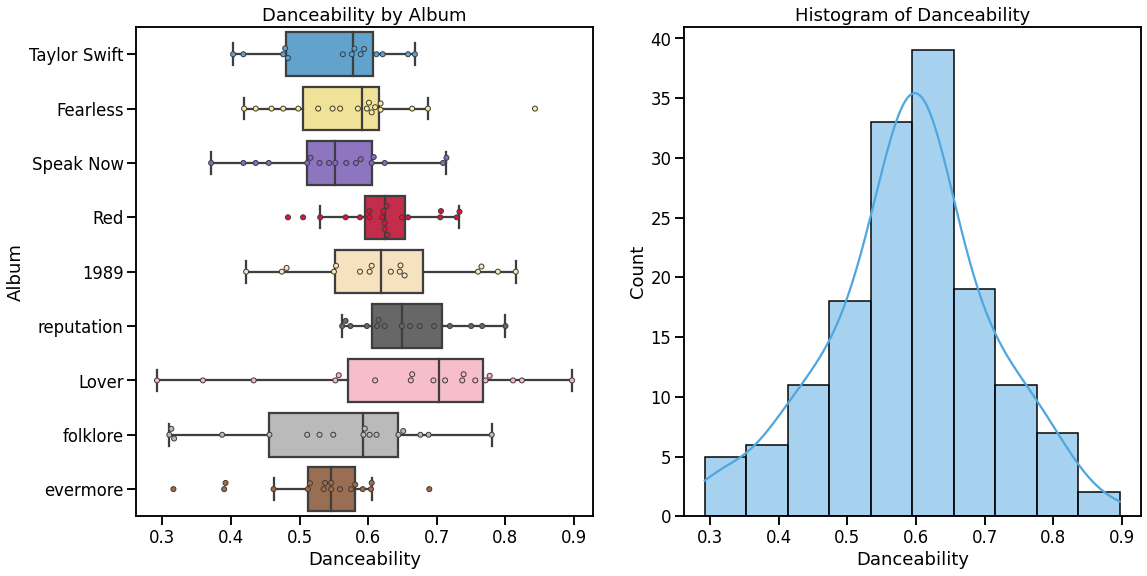

In [20]:
# Plot feature
plot_feature(df, 'danceability', 'Danceability', 'Danceability')

In [21]:
# Display numerical summary
get_summary(df, 'danceability')

,count,mean,std,min,25%,50%,75%,max
danceability,151.00,0.59,0.12,0.29,0.53,0.60,0.66,0.90


In [22]:
# Display top 5 songs
get_top_five(df, 'danceability', True)

,name,album,danceability
119,I Think He Knows,Lover,0.90
24,Hey Stephen,Fearless,0.84
122,Cornelia Street,Lover,0.82
88,Clean,1989,0.81
121,Paper Rings,Lover,0.81


In [23]:
# Display lowest 5 songs 
get_top_five(df, 'danceability', False)

,name,album,danceability
118,The Archer,Lover,0.29
135,exile (feat. Bon Iver),folklore,0.31
148,the lakes - bonus track,folklore,0.31
153,tolerate it,evermore,0.32
144,epiphany,folklore,0.32


### 3.4 Acousticness

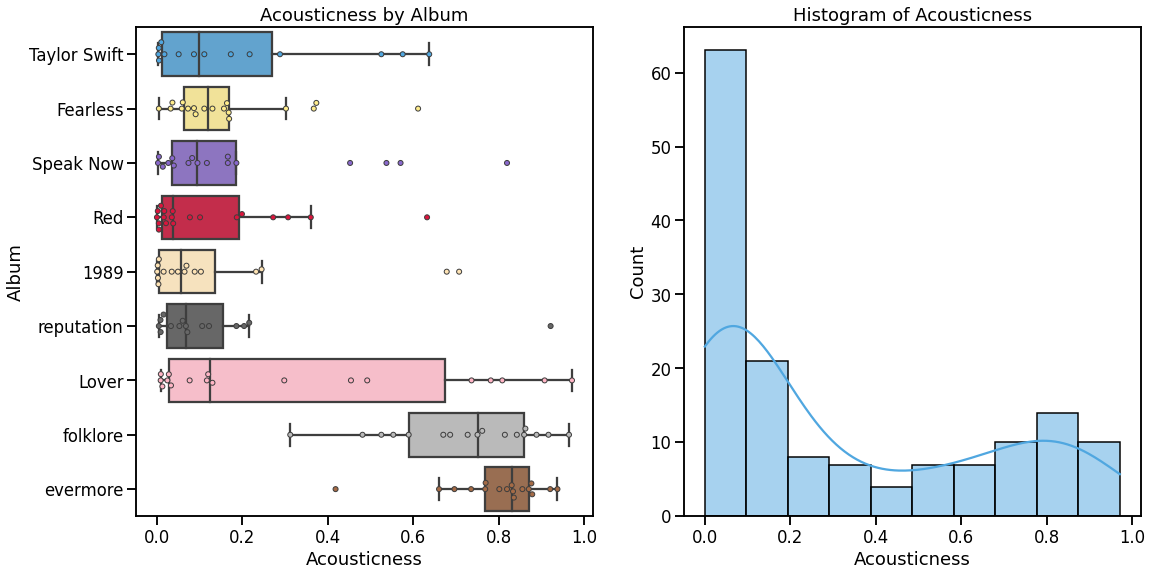

In [24]:
# Plot feature
plot_feature(df, 'acousticness', 'Acousticness', 'Acousticness')

In [25]:
# Display numerical summary
get_summary(df, 'acousticness')

,count,mean,std,min,25%,50%,75%,max
acousticness,151.00,0.31,0.33,0.00,0.04,0.16,0.63,0.97


In [26]:
# Display top 5 songs
get_top_five(df, 'acousticness', True)

,name,album,acousticness
130,It's Nice To Have A Friend,Lover,0.97
147,hoax,folklore,0.96
163,evermore (feat. Bon Iver),evermore,0.94
113,New Year's Day,reputation,0.92
150,champagne problems,evermore,0.92


In [27]:
# Display lowest 5 songs 
get_top_five(df, 'acousticness', False)

,name,album,acousticness
54,State Of Grace,Red,0.00
79,Out Of The Woods,1989,0.00
80,All You Had To Do Was Stay,1989,0.00
59,22,Red,0.00
78,Style,1989,0.00


### 3.5 Energy

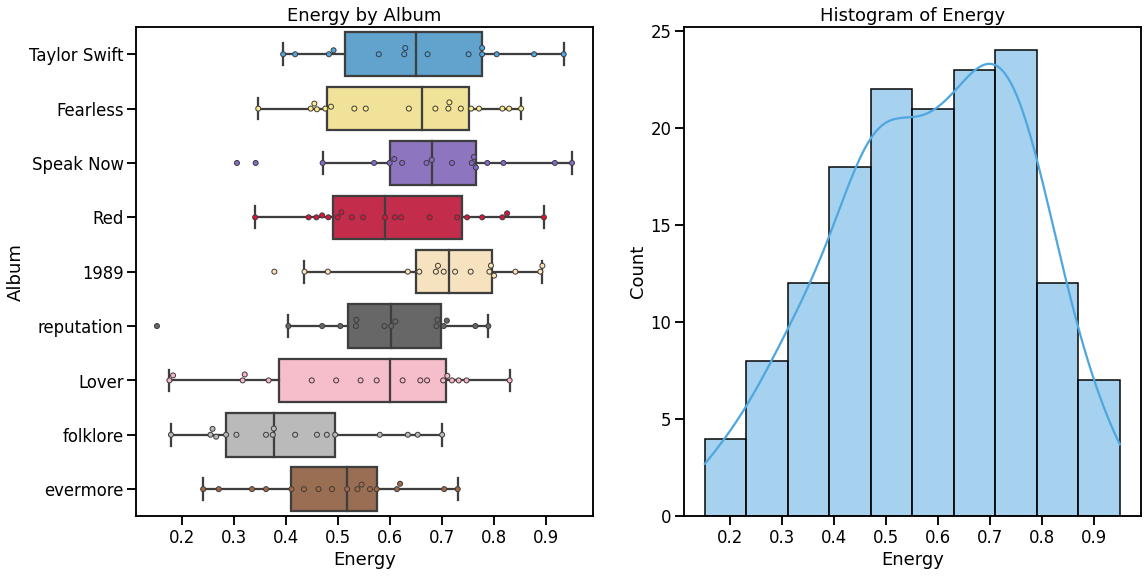

In [28]:
# Plot feature
plot_feature(df, 'energy', 'Energy', 'Energy')

In [29]:
# Display numerical summary
get_summary(df, 'energy')

,count,mean,std,min,25%,50%,75%,max
energy,151.00,0.59,0.18,0.15,0.46,0.61,0.73,0.95


In [30]:
# Display top 5 songs
get_top_five(df, 'energy', True)

,name,album,energy
45,Haunted,Speak Now,0.95
11,I'm Only Me When I'm With You,Taylor Swift,0.93
43,Better Than Revenge,Speak Now,0.92
55,Red,Red,0.90
82,I Wish You Would,1989,0.89


In [31]:
# Display lowest 5 songs 
get_top_five(df, 'energy', False)

,name,album,energy
113,New Year's Day,reputation,0.15
130,It's Nice To Have A Friend,Lover,0.17
147,hoax,folklore,0.18
125,Soon You'll Get Better (feat. The Chicks),Lover,0.18
150,champagne problems,evermore,0.24


### 3.6 Instrumentalness

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

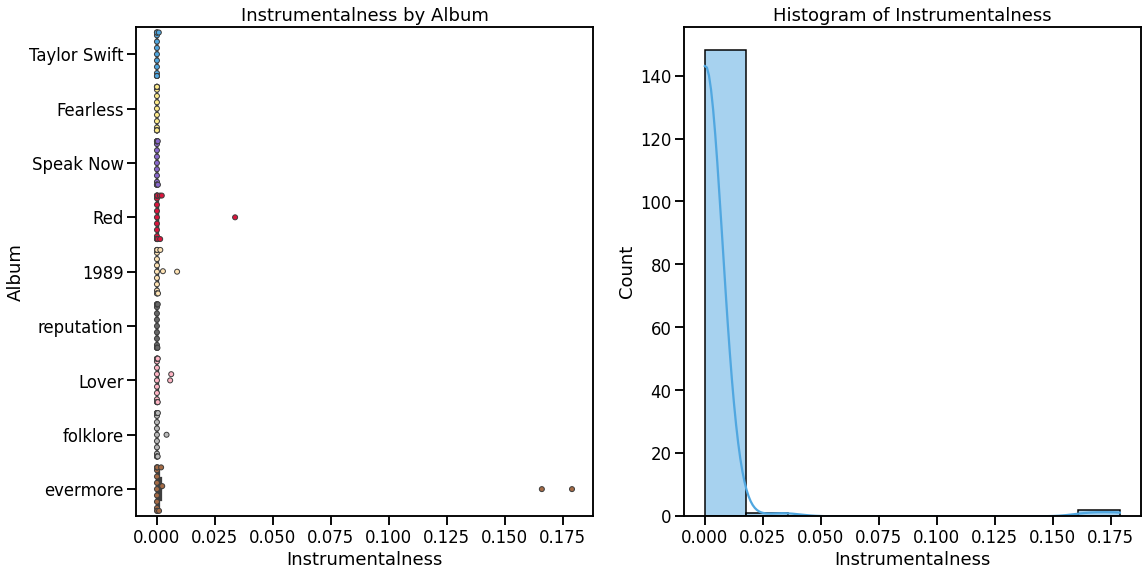

In [32]:
# Plot feature
plot_feature(df, 'instrumentalness', 'Instrumentalness', 'Instrumentalness')

In [33]:
# Display numerical summary
get_summary(df, 'instrumentalness')

,count,mean,std,min,25%,50%,75%,max
instrumentalness,151.00,0.00,0.02,0.00,0.00,0.00,0.00,0.18


In [34]:
# Display top 5 songs
get_top_five(df, 'instrumentalness', True)

,name,album,instrumentalness
160,long story short,evermore,0.18
151,gold rush,evermore,0.17
65,Sad Beautiful Tragic,Red,0.03
85,How You Get The Girl,1989,0.01
120,Miss Americana & The Heartbreak Prince,Lover,0.01


In [35]:
# Display lowest 5 songs 
get_top_five(df, 'instrumentalness', False)

,name,album,instrumentalness
0,Tim McGraw,Taylor Swift,0.00
37,Speak Now,Speak Now,0.00
39,Mean,Speak Now,0.00
155,happiness,evermore,0.00
41,Never Grow Up,Speak Now,0.00


### 3.7 Liveness

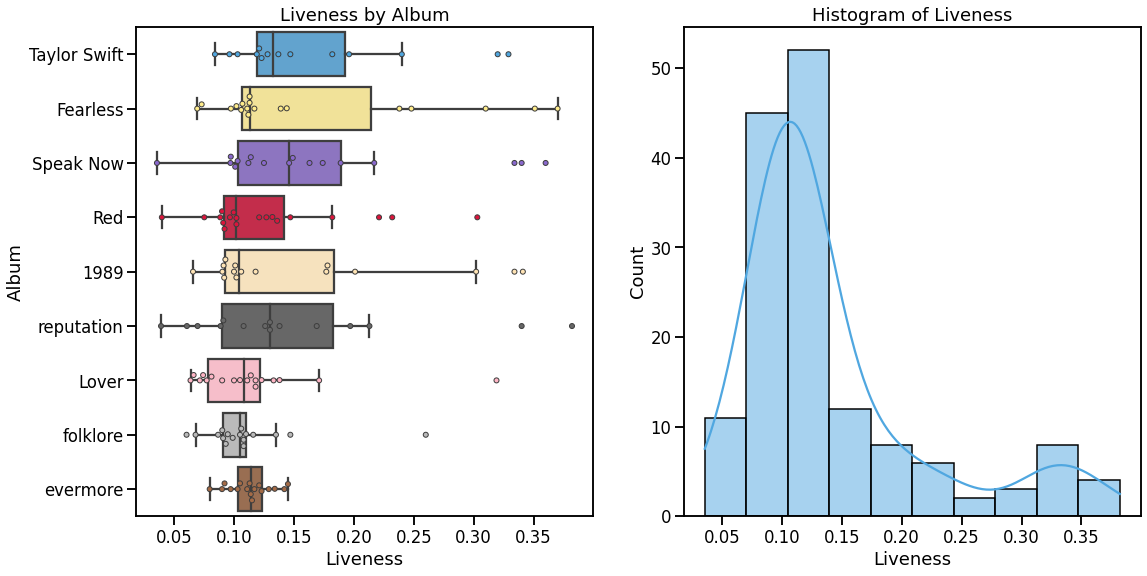

In [36]:
# Plot feature
plot_feature(df, 'liveness', 'Liveness', 'Liveness')

In [37]:
# Display numerical summary
get_summary(df, 'liveness')

,count,mean,std,min,25%,50%,75%,max
liveness,151.00,0.14,0.08,0.04,0.10,0.11,0.15,0.38


In [38]:
# Display top 5 songs
get_top_five(df, 'liveness', True)

,name,album,liveness
111,This Is Why We Can't Have Nice Things,reputation,0.38
28,Tell Me Why,Fearless,0.37
43,Better Than Revenge,Speak Now,0.36
19,SuperStar,Fearless,0.35
79,Out Of The Woods,1989,0.34


In [39]:
# Display lowest 5 songs 
get_top_five(df, 'liveness', False)

,name,album,liveness
40,The Story Of Us,Speak Now,0.04
108,King Of My Heart,reputation,0.04
57,I Knew You Were Trouble.,Red,0.04
137,mirrorball,folklore,0.06
102,Don't Blame Me,reputation,0.06


### 3.8 Loudness

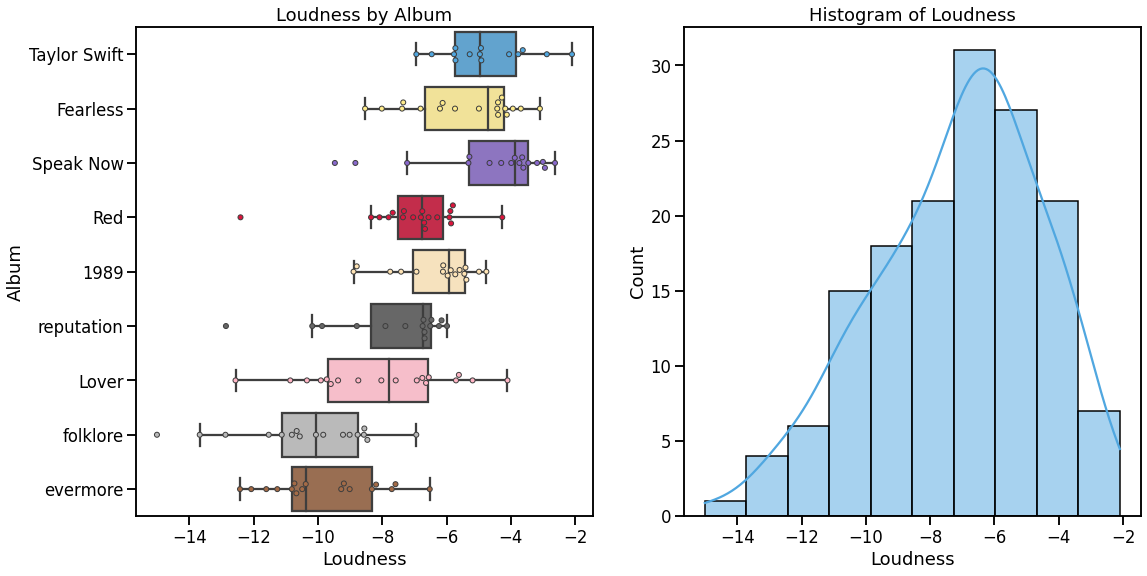

In [40]:
# Plot feature
plot_feature(df, 'loudness', 'Loudness', 'Loudness')

In [41]:
# Display numerical summary
get_summary(df, 'loudness')

,count,mean,std,min,25%,50%,75%,max
loudness,151.00,-7.15,2.61,-15.01,-8.82,-6.75,-5.35,-2.10


In [42]:
# Display top 5 songs
get_top_five(df, 'loudness', True)

,name,album,loudness
1,Picture To Burn,Taylor Swift,-2.10
45,Haunted,Speak Now,-2.63
3,A Place in this World,Taylor Swift,-2.88
34,Mine,Speak Now,-2.94
35,Sparks Fly,Speak Now,-3.00


In [43]:
# Display lowest 5 songs 
get_top_five(df, 'loudness', False)

,name,album,loudness
147,hoax,folklore,-15.01
144,epiphany,folklore,-13.68
146,peace,folklore,-12.88
113,New Year's Day,reputation,-12.86
125,Soon You'll Get Better (feat. The Chicks),Lover,-12.57


### 3.9 Speechiness

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

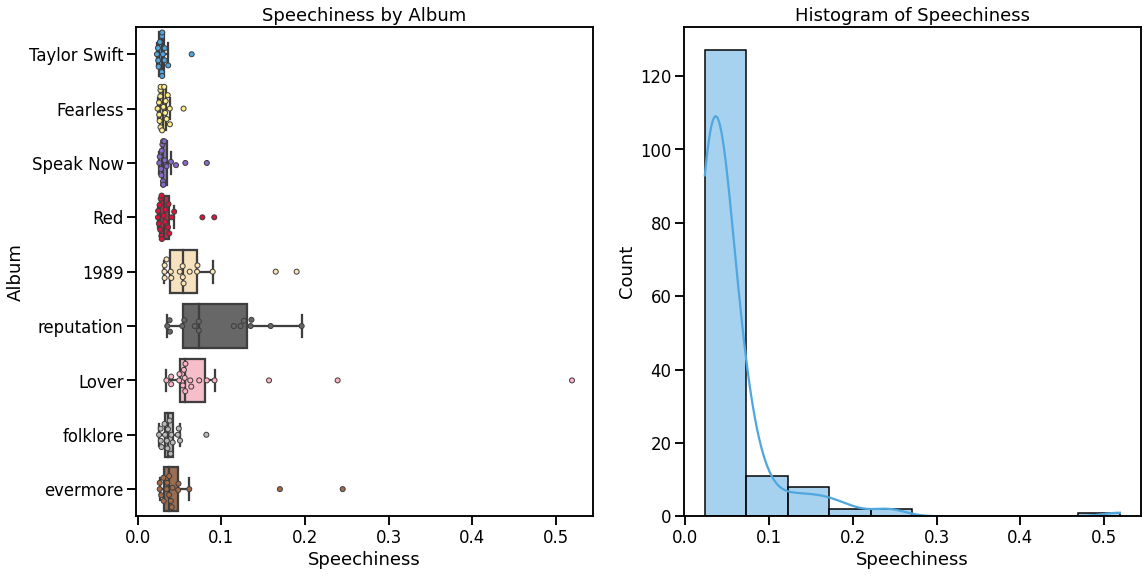

In [44]:
# Plot feature
plot_feature(df, 'speechiness', 'Speechiness', 'Speechiness')

In [45]:
# Display numerical summary
get_summary(df, 'speechiness')

,count,mean,std,min,25%,50%,75%,max
speechiness,151.00,0.05,0.06,0.02,0.03,0.04,0.06,0.52


In [46]:
# Display top 5 songs
get_top_five(df, 'speechiness', True)

,name,album,speechiness
114,I Forgot That You Existed,Lover,0.52
162,closure,evermore,0.24
126,False God,Lover,0.24
109,Dancing With Our Hands Tied,reputation,0.20
83,Bad Blood,1989,0.19


In [47]:
# Display lowest 5 songs 
get_top_five(df, 'speechiness', False)

,name,album,speechiness
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,0.02
19,SuperStar,Fearless,0.02
58,All Too Well,Red,0.02
12,Invisible,Taylor Swift,0.02
62,Stay Stay Stay,Red,0.02


### 3.10 Tempo

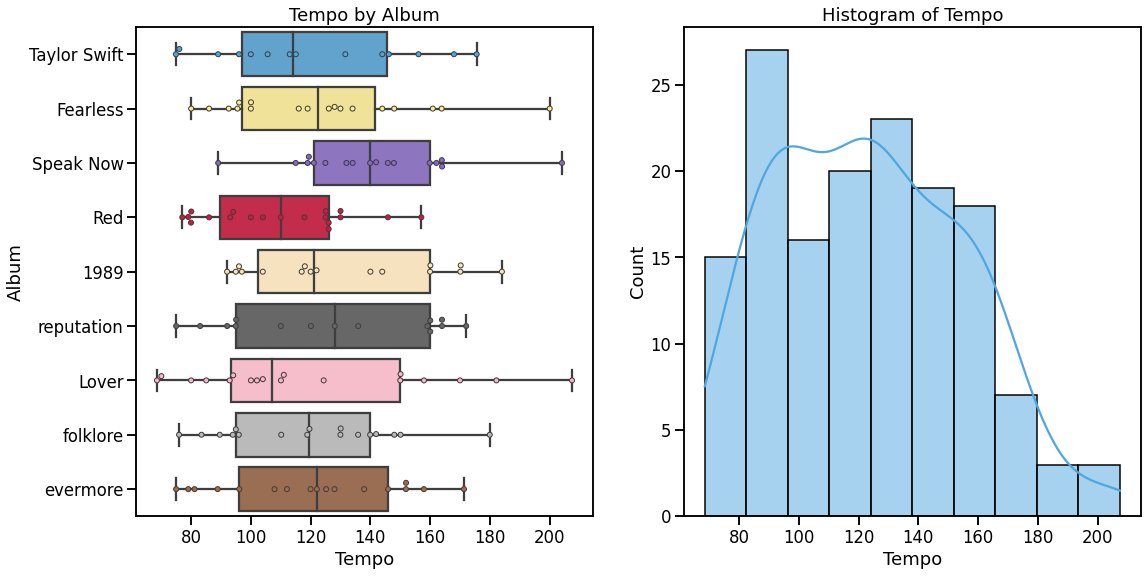

In [48]:
# Plot feature
plot_feature(df, 'tempo', 'Tempo', 'Tempo')

In [49]:
# Display numerical summary
get_summary(df, 'tempo')

,count,mean,std,min,25%,50%,75%,max
tempo,151.00,123.39,31.43,68.53,95.97,121.07,147.01,207.48


In [50]:
# Display top 5 songs
get_top_five(df, 'tempo', True)

,name,album,tempo
125,Soon You'll Get Better (feat. The Chicks),Lover,207.48
47,Long Live,Speak Now,204.12
16,Untouchable,Fearless,200.02
89,Wonderland,1989,184.01
129,ME! (feat. Brendon Urie of Panic! At The Disco),Lover,182.16


In [51]:
# Display lowest 5 songs 
get_top_five(df, 'tempo', False)

,name,album,tempo
116,Lover,Lover,68.53
130,It's Nice To Have A Friend,Lover,70.01
9,Mary's Song (Oh My My My),Taylor Swift,74.90
153,tolerate it,evermore,74.95
105,So It Goes...,reputation,74.96


### 3.11 Time Signature

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

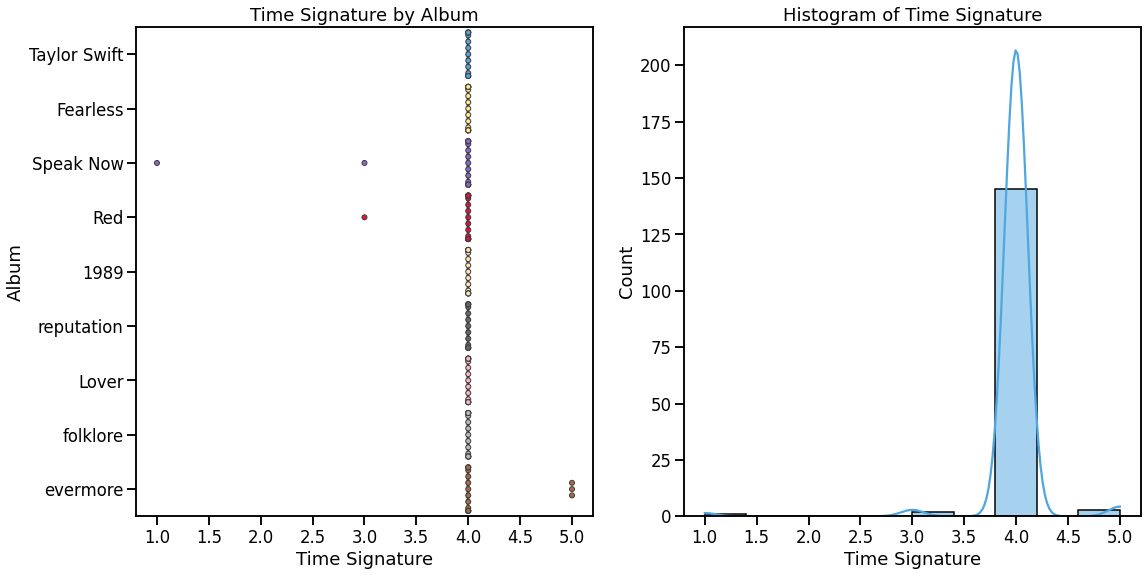

In [52]:
# Plot feature
plot_feature(df, 'time_signature', 'Time Signature', 'Time Signature')

In [53]:
# Display numerical summary
get_summary(df, 'time_signature')

,count,mean,std,min,25%,50%,75%,max
time_signature,151.00,3.99,0.31,1.00,4.00,4.00,4.00,5.00


In [54]:
# Display top 5 songs
get_top_five(df, 'time_signature', True)

,name,album,time_signature
163,evermore (feat. Bon Iver),evermore,5
162,closure,evermore,5
153,tolerate it,evermore,5
0,Tim McGraw,Taylor Swift,4
117,The Man,Lover,4


In [55]:
# Display lowest 5 songs 
get_top_five(df, 'time_signature', False)

,name,album,time_signature
46,Last Kiss,Speak Now,1
38,Dear John,Speak Now,3
65,Sad Beautiful Tragic,Red,3
111,This Is Why We Can't Have Nice Things,reputation,4
112,Call It What You Want,reputation,4


### 3.12 Valence

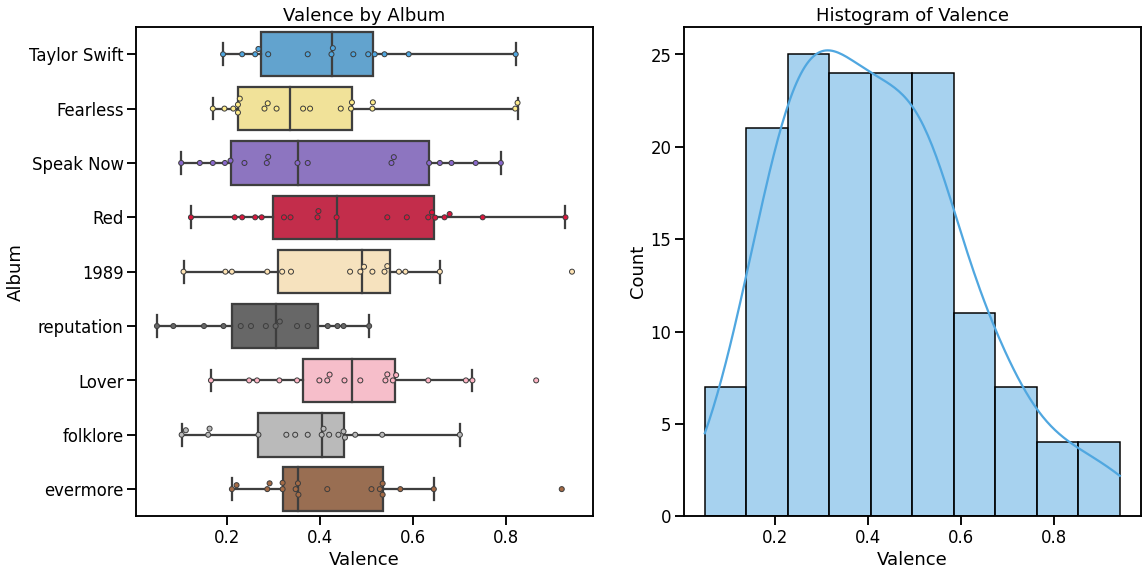

In [56]:
# Plot feature
plot_feature(df, 'valence', 'Valence', 'Valence')

In [57]:
# Display numerical summary
get_summary(df, 'valence')

,count,mean,std,min,25%,50%,75%,max
valence,151.00,0.42,0.19,0.05,0.27,0.40,0.54,0.94


In [58]:
# Display top 5 songs
get_top_five(df, 'valence', True)

,name,album,valence
81,Shake It Off,1989,0.94
62,Stay Stay Stay,Red,0.93
162,closure,evermore,0.92
121,Paper Rings,Lover,0.86
24,Hey Stephen,Fearless,0.82


In [59]:
# Display lowest 5 songs 
get_top_five(df, 'valence', False)

,name,album,valence
103,Delicate,reputation,0.05
110,Dress,reputation,0.09
38,Dear John,Speak Now,0.10
144,epiphany,folklore,0.10
86,This Love,1989,0.11
